In [1]:
import matplotlib.pyplot as plt
import numpy as np



In [ ]:
X = np.linspace(0,1,20)
Y = X*X



In [66]:
! ../.g


[master d0732e6] web
 2 files changed, 160 insertions(+), 164 deletions(-)
 rewrite MATH/torus_geodesics.ipynb (61%)
Enumerating objects: 9, done.
Counting objects: 100% (9/9), done.
Delta compression using up to 2 threads
Compressing objects: 100% (5/5), done.
Writing objects: 100% (5/5), 40.13 KiB | 1.54 MiB/s, done.
Total 5 (delta 4), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (4/4), completed with 3 local objects.
To https://github.com/macbuse/macbuse.github.io.git
   f6be522..d0732e6  master -> master


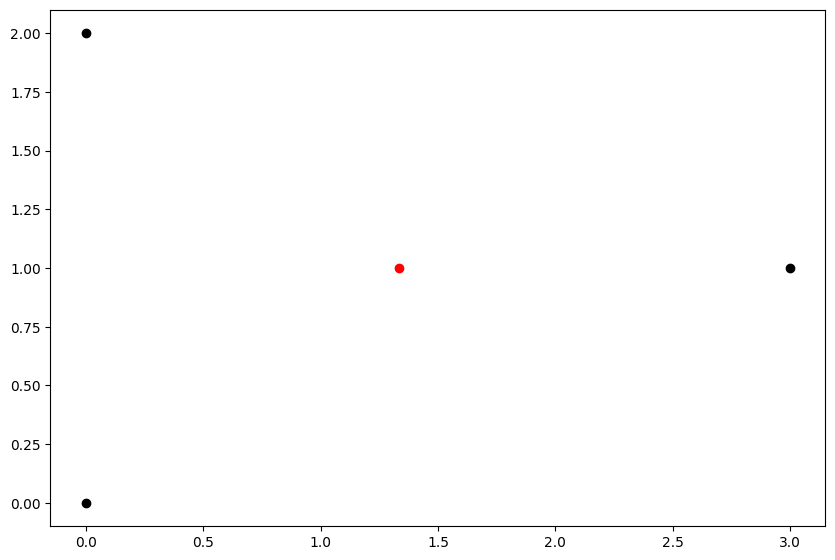

In [4]:
def circenter(pts):
    M = 2 * (pts[1:] - pts[0])
    if  np.isclose(np.linalg.det(M), 0): return None
    v = np.sum(pts[1:]**2, axis=1) - np.sum(pts[0]**2)
    return np.linalg.solve(M, v)

A = [0,0]
B = [3,1]
C = [0,2]
pts = np.array([A,B,C])

x,y = circenter(np.array([A,B,C]))

fig, ax  = plt.subplots(1, figsize=(10, 10))
ax.set_aspect('equal')
X,Y = pts.T
ax.plot(X,Y,'ko');
ax.plot(x,y,'ro');


In [5]:
def get_conic_pencil(points):

    A = np.zeros((4, 6))
    for i, (x, y) in enumerate(points):
        A[i] = [x**2, x*y, y**2, x, y, 1]
    
    # We use Singular Value Decomposition (SVD) to find the null space
    # The last two rows of Vh (right singular vectors) form the basis
    _, _, Vh = np.linalg.svd(A)
    
    # These are the two "basis" conics
    conic1 = Vh[-1]
    conic2 = Vh[-2]
    
    return conic1, conic2,A,Vh

# Example points

Z = np.array([ 0, 2, 2 + 3J, 3J])
Z = Z - (.5 + 1J)

pts = np.array([Z.real,Z.imag]).T

c1, c2, A, VH = get_conic_pencil(pts)

for (x,y) in pts:
    print(x,y, VH[-2]@[x**2, x*y, y**2, x, y , 1])

-0.5 -1.0 -1.1102230246251565e-16
1.5 -1.0 -1.1102230246251565e-15
1.5 2.0 9.43689570931383e-16
-0.5 2.0 -3.885780586188048e-16


In [6]:
c1

array([-0.39717124,  0.        , -0.23109404,  0.39717124,  0.23109404,
        0.76006651])

0.49999999999999994 0.5


ValueError: operands could not be broadcast together with shapes (20,) (2,) 

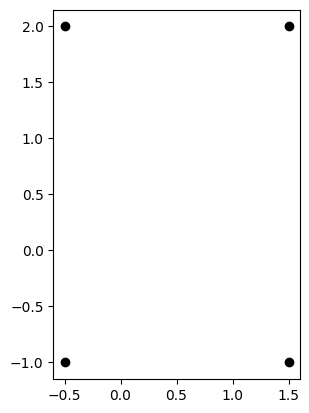

In [388]:
def get_ellipse_params(coeffs):
    """
    Input: coeffs = [A, B, C, D, E, F] 
    for Ax^2 + Bxy + Cy^2 + Dx + Ey + F = 0
    """
    A, B, C, D, E, F = coeffs
    
    # 1. Find the center
    det = B**2 - 4*A*C
    if det >= 0:
        raise ValueError("The provided coefficients do not form an ellipse.")
        
    xc = (B*E - 2*C*D) / det
    yc = (B*D - 2*A*E) / det
    
    # 2. Re-calculate the constant term for the centered ellipse
    # F_new = Ax_c^2 + Bx_cy_c + Cy_c^2 + Dx_c + Ey_c + F
    F_new = A*xc**2 + B*xc*yc + C*yc**2 + D*xc + E*yc + F
    
    # 3. Eigen-decomposition of the quadratic form matrix
    Q = np.array([[A, B/2], 
                  [B/2, C]])
    
    evals, evecs = np.linalg.eigh(Q)
    
    # 4. Calculate axis lengths
    # The equation is now: L1*x'^2 + L2*y'^2 + F_new = 0
    # Semi-axis lengths: a,b
    # Note: L1, L2 must have opposite sign of F_new for a real ellipse
    a, b  = np.sqrt(np.abs(F_new / evals))
    
    angle = np.arctan2(evecs[1, 0], evecs[0, 0])
    
    return {
        "center": (xc, yc),
        "w": 2*a, "h" : 2*b,
        "rot": np.degrees(angle)
    }

import numpy as np

def get_ellipse_params(coeffs):
    """
    Calculates center, axes lengths, and rotation from conic coefficients.
    Input: coeffs = [A, B, C, D, E, F] 
    for Ax^2 + Bxy + Cy^2 + Dx + Ey + F = 0
    """
    A, B, C, D, E, F = coeffs
    
    # 1. Verify it's an ellipse (discriminant must be negative)
    # Note: B is the coefficient of xy, so B^2 - 4AC
    if B**2 - 4*A*C >= 0:
        raise ValueError("Coefficients do not represent an ellipse.")

    # 2. Find the center (xc, yc)
    # Solving the system: 
    # 2Ax + By + D = 0
    # Bx + 2Cy + E = 0
    M_center = np.array([[2*A, B], 
                         [B, 2*C]])
    v_center = np.array([-D, -E])
    xc, yc = np.linalg.solve(M_center, v_center)
    print(xc,yc)
    
    # 3. Calculate the new constant term (F_prime) for the centered ellipse
    # Ax^2 + Bxy + Cy^2 + F' = 0
    F_new = A*xc**2 + B*xc*yc + C*yc**2 + D*xc + E*yc + F
    
    # 4. Extract rotation and semi-axes using Eigen-decomposition
    # Quadratic form matrix Q
    Q = M/2
    
    evals, evecs = np.linalg.eigh(Q)
    
    T = np.linspace(0,2*np.pi,20)
    V = np.cos(T)*evecs[0] +  np.sin(T)*evecs[1]
    return V



from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_aspect("equal")

X,Y = pts.T
ax.plot(X,Y,'ko')

X,Y = get_ellipse_params(c1).T
ax.plot(X,Y,'ko')

#ax.add_patch(ellipse_patch)


plt.show
p

/tmp/ipykernel_29436/3061239146.py:19: RuntimeWarning: invalid value encountered in sqrt
  b_length = np.sqrt(numerator / (denom * (A + C - term)))


{'ce': array([-2.71807315e-17,  5.00000000e-01]), 'w': np.float64(0.8350001539814396), 'h': np.float64(nan), 'rot': np.float64(8.92641769187681e-17)}


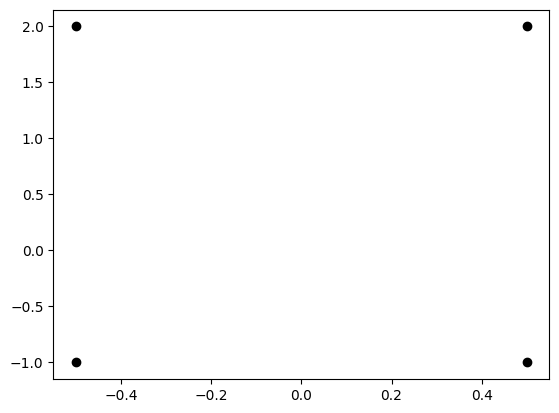

In [371]:
import numpy as np

def get_ellipse_params(coeffs):
    """
    Input: coeffs = [A, B, C, D, E, F] 
    for Ax^2 + Bxy + Cy^2 + Dx + Ey + F = 0
    """

    A, B, C, D, E, F = coeffs
    # Calculate the center of the get_ellipse_params get_ellipse_params     
    denom = B**2 - 4*A*C
    x0 = (2*C*D - B*E) / denom
    y0 = (2*A*E - B*D) / denom
    center = np.array([x0, y0])
    # Calculate the axes lengths
    numerator = 2 * (A*E**2 + C*D**2 - B*D*E + denom*F)
    term = np.sqrt((A - C)**2 + B**2)
    a_length = np.sqrt(numerator / (denom * (A + C + term)))
    b_length = np.sqrt(numerator / (denom * (A + C - term)))
    axes = np.array([a_length, b_length])
    # Calculate the rotation angle
    if B == 0 and A < C:
        angle = 0
    elif B == 0 and A >= C:
        angle = np.pi / 2
    else:
        angle = 0.5 * np.arctan2(B, A - C)  

    return {"ce" : center, 
            "w": a_length, "h" : b_length, 
            "rot": angle}


fig, ax = plt.subplots()
X,Y = pts.T

ax.autoscale()
c1 *= -1
for t  in np.linspace(-.9,1,20): 
    ell = c1 + t*c2
    try:
        p = get_ellipse_params(c2) # Using c1 from the previous step
        ellipse_patch = Ellipse(xy=p['ce'],
                            width=p["w"], height=p["h"],
                            angle= p['rot'], 
                            fill=False, color='blue')
        ax.add_patch(ellipse_patch)
    except: pass

print(p)
ax.plot(X,Y,'ko')
plt.show()

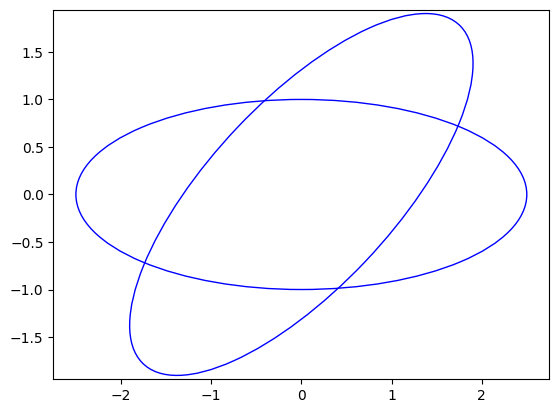

In [320]:
fig, ax = plt.subplots()
X,Y = pts.T

ax.autoscale()


ellipse_patch = Ellipse(xy=(0,0),
                            width=5, height=2,
                            angle= 0, 
                            fill=False, color='blue')

ellipse_patch = Ellipse(xy=(0,0),
                            width=5, height=2,
                            angle= 45, 
                            fill=False, color='blue')

ax.add_patch(ellipse_patch)

plt.show()

In [223]:
pp = pts.T
ax,ay = pp[0]
bx,by = pp[1]
cx,cy = pp[2]

nn = np.diag(pp@pts)

d = 2 * (ax * (by - cy) + bx * (cy - ay) + cx * (ay - by))
ux = (nn[0]* (by - cy) + nn[1] * (cy - ay) + nn[2] * (ay - by)) / d
uy = (nn[0] * (cx - bx) + nn[1] * (ax - cx) + nn[2] * (bx - ax)) / d

ux,uy,d

(np.float64(0.5), np.float64(1.0), np.int64(4))

In [252]:
d = {"w" : 5}
d["w"]

5

In [200]:
import math

def circumcenter(A, B, C):
    """
    Calculate the circumcenter of a triangle.
    A, B, C are tuples representing points (x, y)
    Returns a tuple (x, y) for the circumcenter
    """

    x1, y1 = A
    x2, y2 = B
    x3, y3 = C

    # Determinant
    D = 2 * (x1*(y2 - y3) + x2*(y3 - y1) + x3*(y1 - y2))

    if D == 0:
        raise ValueError("Points are collinear; circumcircle does not exist.")

    Ux = (
        (x1**2 + y1**2) * (y2 - y3) +
        (x2**2 + y2**2) * (y3 - y1) +
        (x3**2 + y3**2) * (y1 - y2)
    ) / D

    Uy = (
        (x1**2 + y1**2) * (x3 - x2) +
        (x2**2 + y2**2) * (x1 - x3) +
        (x3**2 + y3**2) * (x2 - x1)
    ) / D

    return (Ux, Uy)

pp = pts.T

circumcenter(pp[0],pp[1],pp[2]), pp


((np.float64(0.5), np.float64(1.0)),
 array([[0, 0],
        [1, 2],
        [0, 2]]))

In [146]:
M = np.ones((3,3))
M[0] = nn
M[1] = pts[1]
M, np.linalg.det(M)

(array([[0., 2., 1.],
        [0., 1., 1.],
        [1., 1., 1.]]),
 np.float64(1.0))

In [149]:
M[1] = pts[0]
M, -np.linalg.det(M)

(array([[0., 2., 1.],
        [0., 1., 0.],
        [1., 1., 1.]]),
 np.float64(-1.0))